In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data = pd.read_csv("uber.csv")

data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.50,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.70,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.90,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.30,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.00,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
35720,13789976,2009-03-17 16:40:34.0000002,4.10,2009-03-17 16:40:34 UTC,-73.989167,40.762935,-73.991962,40.754702,3.0
35721,51786630,2014-06-12 20:03:00.000000201,6.00,2014-06-12 20:03:00 UTC,-73.976287,40.760280,-73.983277,40.763827,5.0
35722,50738790,2013-04-09 10:21:38.0000002,20.83,2013-04-09 10:21:38 UTC,-73.988428,40.670634,-74.013862,40.714818,1.0
35723,3187125,2011-04-03 12:44:31.0000002,16.50,2011-04-03 12:44:31 UTC,-74.001600,40.727635,-73.983275,40.781579,1.0


Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64
Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


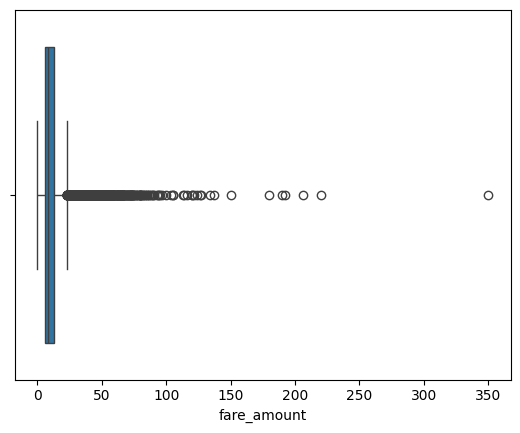

In [3]:
# 1. Pre-process the dataset

# Remove unnecessary column
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], errors='coerce')

missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

data.dropna(inplace=True)

# To fill missing values with the mean value of the column:
# data.fillna(data.mean(), inplace=True)

# Ensure there are no more missing values
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

# 2. Identify outliers
# visualization to detect outliers.
sns.boxplot(x=data["fare_amount"])
plt.show()

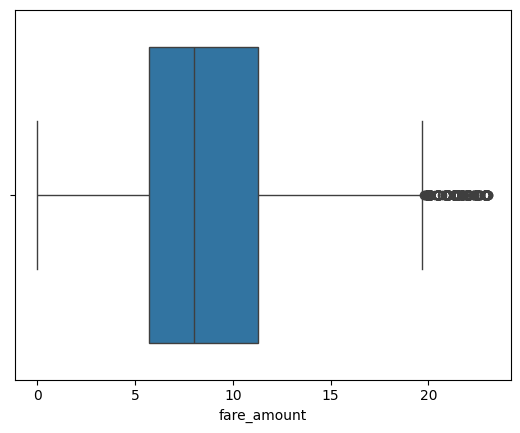

In [4]:
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

,0
Unnamed: 0,"Axes(0.125,0.786098;0.352273x0.0939024)"
fare_amount,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
pickup_latitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.547727,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.125,0.448049;0.352273x0.0939024)"


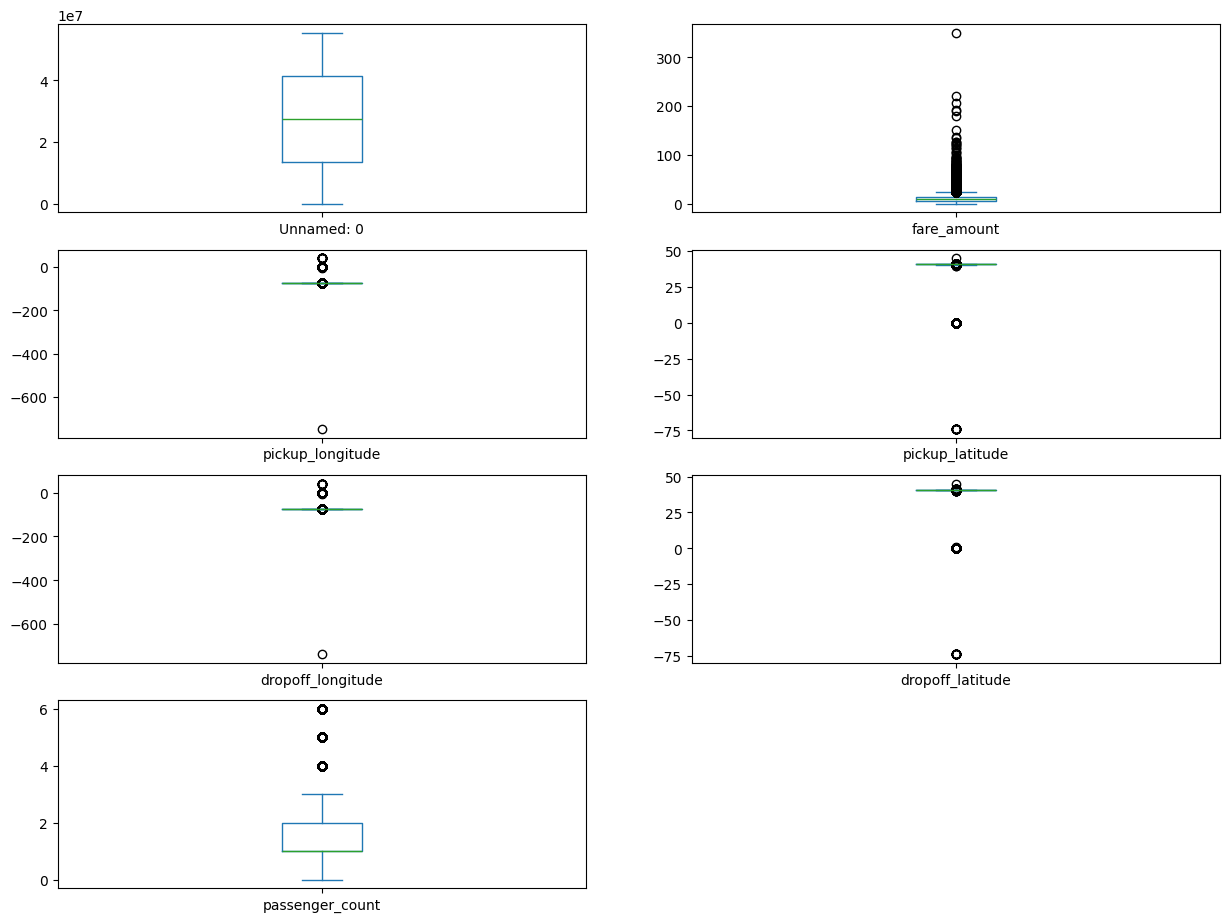

In [5]:
data.plot(kind="box",subplots=True, layout=(7, 2), figsize=(15, 20))

In [10]:
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
35719,7.00
35720,4.10
35721,6.00
35722,20.83


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# 5. Evaluate the models
# Predict the values
y_pred_lr = lr_model.predict(X_test)
y_pred_lr
print("Linear Model:",y_pred_lr)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model:", y_pred_rf)

Linear Model: [11.24865047 11.25016255 11.24670531 ... 11.24488983 11.2485216
 11.24680764]
Random Forest Model: [5.391 9.852 5.858 ... 8.918 6.277 8.817]


In [16]:
# Calculate R-squared (R2) and Root Mean Squared Error (RMSE) for both models
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [17]:
# Compare the scores
print("Linear Regression - R2:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)

Linear Regression - R2: 0.0004072413866537117
Linear Regression - RMSE: 11.07842072394465


In [18]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R2:", r2_rf)
print("Random Forest Regression RMSE:",rmse_rf)

Random Forest Regression R2: 0.6458428751413542
Random Forest Regression RMSE: 6.594233104272209
